2013-07-04UT19:09:19.11011930.marion.vr2


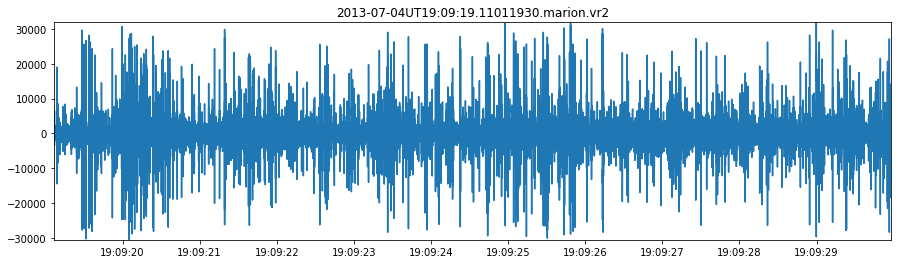

(434176,)
(129, 1696)


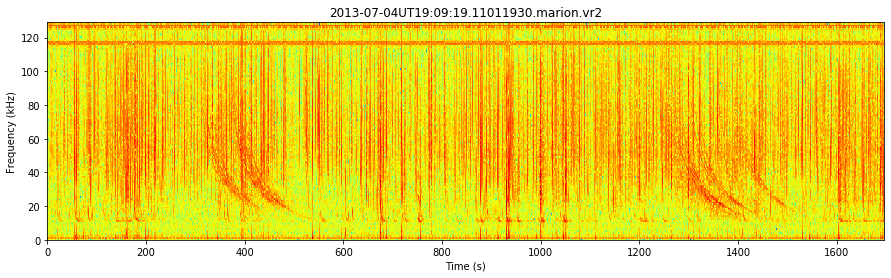

(129, 2107)


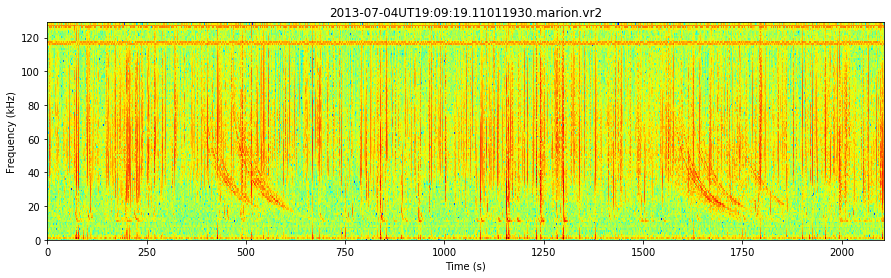

In [4]:
import sys
import os
import numpy as np
import pandas as pd
import datetime
from math import ceil, sqrt, floor
from scipy import signal, stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))

from dataset import Dataset
from database import Database
from sample import Sample
from h5_sample import H5Sample

dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
site = 'marion'
my_database = Database(dataset_loc, database_loc, site)
my_dataset = Dataset(dataset_loc, site, ext='.vr2')
# my_dataset.get_random_sample()
# my_sample = Sample(dataset_loc, site, my_dataset.get_random_sample())
# my_sample = Sample(dataset_loc, site, '2013-05-27UT00:59:39.62002156.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-05-20UT20:15:09.24222156.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-07-25UT15:06:06.85411922.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-07-26UT02:35:55.34691914.marion.vr2')
my_sample = Sample(dataset_loc, site, '2013-07-04UT19:09:19.11011930.marion.vr2')

print(my_sample.get_file())

size=(15,4)
cmap='jet'
axis=False
my_sample.signal_plot(figsize=size, title=my_sample.get_file())
print(my_sample.vr2_to_panda()[0]['X'].shape)
# my_sample.spectrogram_plot(figsize=size, xaxis=axis, yaxis=axis, xlabel='Time (s)', ylabel='Frequency (kHz)', title=my_sample.get_file(), cmap=cmap, cmap_show=False)

my_sample.spectrogram_with_axis(nperseg=256, noverlap=0, nfft = 256, detrend = 'constant', scaling = 'spectrum', mode = 'magnitude', log10 = True, kHz = True, abs_val = False)
print(my_sample.get_spectrogram().shape)
my_sample.spectrogram_plot(figsize=size, xaxis=axis, yaxis=axis, xlabel='Time (s)', ylabel='Frequency (kHz)', title=my_sample.get_file(), cmap=cmap, cmap_show=False)

my_sample.spectrogram_with_axis(nperseg=256, noverlap=50, nfft = 256, detrend = 'constant', scaling = 'spectrum', mode = 'magnitude', log10 = True, kHz = True, abs_val = False)
print(my_sample.get_spectrogram().shape)
my_sample.spectrogram_plot(figsize=size, xaxis=axis, yaxis=axis, xlabel='Time (s)', ylabel='Frequency (kHz)', title=my_sample.get_file(), cmap=cmap, cmap_show=False)